In [10]:
# Let's load the deeplifting data

In [11]:
%cd ../..

/Users/ryandevera/data-science


In [23]:
import glob
import pandas as pd
import seaborn as sns

In [13]:
file_path = '/Users/ryandevera/data-science/umn_environments/Deeplifting/low-dimension-search-results/*/*'
files = glob.glob(file_path)

In [14]:
data = pd.read_parquet(files)

In [15]:
data

,x1,x2,f,f_initial,algorithm,total_time,input_size,hidden_size,num_layers,num_neurons,hidden_activation,output_activation,agg_function,include_bn,problem_name,global_minimum,dimensions,hits
0,2.772587e-09,-1.447528e-09,-2.000000e+02,-150.789209,Deeplifting,7.464379,1,128-128-128,3,128,sine,sine,sum,False,ackley2,-200,2,True
1,-2.167155e-13,-1.811884e-13,-2.000000e+02,-147.957473,Deeplifting,19.260019,1,128-128-128,3,128,sine,sine,sum,False,ackley2,-200,2,True
2,3.802764e-07,-2.166322e-08,-2.000000e+02,-150.789398,Deeplifting,7.069870,1,256-256,2,256,sine,sine,sum,False,ackley2,-200,2,True
3,-1.158185e-12,-3.090861e-13,-2.000000e+02,-147.964597,Deeplifting,28.924216,1,256-256,2,256,sine,sine,sum,False,ackley2,-200,2,True
4,1.776357e-13,4.902745e-13,-2.000000e+02,-150.789582,Deeplifting,7.146130,1,128-128,2,128,sine,sine,sum,False,ackley2,-200,2,True
5,-5.413234e-07,6.356824e-08,-2.000000e+02,-147.966219,Deeplifting,5.304307,1,128-128,2,128,sine,sine,sum,False,ackley2,-200,2,True
6,-1.516273e-09,-5.572698e-09,-2.000000e+02,-150.786547,Deeplifting,18.388727,1,256-256-256,3,256,sine,sine,sum,False,ackley2,-200,2,True
7,8.722694e-10,-4.493547e-09,-2.000000e+02,-147.966420,Deeplifting,29.525934,1,256-256-256,3,256,sine,sine,sum,False,ackley2,-200,2,True
8,1.519780e-10,-1.519815e-10,-2.000000e+02,-150.789398,Adam,27.038162,1,256-256,2,256,sine,sine,sum,False,ackley2,-200,2,True
9,-1.087688e-09,1.087692e-09,-2.000000e+02,-147.964597,Adam,27.047921,1,256-256,2,256,sine,sine,sum,False,ackley2,-200,2,True


In [16]:
# We have the number of layers and the number of neurons so we should be able to make a
# performance profile or heat map regarding complexity
# Let's also add another model

In [21]:
complexity_df = (
    data.loc[data['algorithm'] == 'Deeplifting']
    .groupby(['algorithm', 'num_layers', 'num_neurons'])['hits']
    .mean()
    .reset_index()
    .pivot_table(index='num_layers', columns='num_neurons', values='hits')
)

<Axes: xlabel='num_neurons', ylabel='num_layers'>

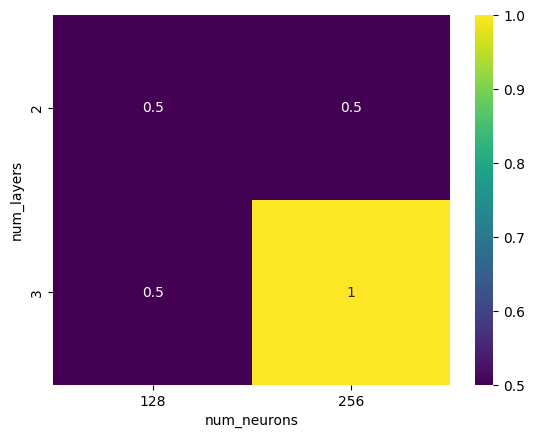

In [28]:
sns.heatmap(complexity_df, annot=True, cmap='viridis')

In [31]:
low_dimensional_problem_names = [
    'ackley',
    'ackley2',
    'ackley3',
    'adjiman',
    'alpine1',
    'alpine2',
    'bartels_conn',
    'beale',
    'bird',
    'bohachevsky1',
    'bohachevsky2',
    'bohachevsky3',
    'booth',
    'branin_rcos',
    'brent',
    'bukin_n2',
    'bukin_n4',
    'bukin_n6',
    'camel_3hump',
    'camel_6hump',
    'chung_reynolds',
    'cross_in_tray',
    'cross_leg_table',
    'crowned_cross',
    # 'cube',
    'drop_wave',
    'eggholder',
    # 'ex8_1_1',
    'griewank',
    'holder_table',
    'levy',
    'levy_n13',
    'mathopt6',
    'rastrigin',
    'rosenbrock',
    'schaffer_n2',
    'schaffer_n4',
    'schwefel',
    'shubert',
    'rosenbrock',
    'xinsheyang_n2',
    'xinsheyang_n3',
]

In [32]:
len(low_dimensional_problem_names)

40